<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [108]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [109]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [110]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [111]:
import yfinance as yf
tesla = yf.Ticker('TSLA')
print(tesla)

yfinance.Ticker object <TSLA>


In [112]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Verify the ticker object
print(tesla)


yfinance.Ticker object <TSLA>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [113]:
# Extract historical stock information for Tesla with the maximum time period
tesla_data = tesla.history(period="max")

# Display the first few rows to verify the data
print(tesla_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [114]:
# Reset the index of the tesla_data DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [115]:
import requests
from bs4 import BeautifulSoup
import requests

url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text content of the response in the variable `html_data`
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

Webpage downloaded successfully.


In [116]:
import requests

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the response text (HTML content) as a variable
html_data = response.text

# Display the first 500 characters to check the content
print(html_data[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [117]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML data with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the relevant table (assuming it is the first table on the page)
table = soup.find('table')

# Initialize lists to store the extracted data
dates = []
revenues = []

# Loop through each row in the table, skipping the header row
for row in table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure there are enough columns
        date = cols[0].text.strip()  # Extract the date
        revenue = cols[1].text.strip()  # Extract the revenue
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame
tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Clean the 'Revenue' column to remove $ and commas
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r',|\$', '', regex=True).astype(float)

# Display the cleaned DataFrame
print(tesla_revenue.head())


   Date  Revenue
0  2021  53823.0
1  2020  31536.0
2  2019  24578.0
3  2018  21461.0
4  2017  11759.0


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [118]:
import pandas as pd

# URL of the webpage containing the Tesla Revenue table
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use read_html to extract tables
tables = pd.read_html(url)

# Check how many tables were found
print(f"Found {len(tables)} tables on the page.")

# Assuming the Tesla Revenue data is in the first table, let's check its structure
tesla_revenue = tables[0]  # Access the first table
tesla_revenue.columns = ["Date", "Revenue"]  # Rename columns for clarity

# Clean the 'Revenue' column to remove $ and commas
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r',|\$', '', regex=True).astype(float)

# Display the cleaned DataFrame
print(tesla_revenue.head())


Found 6 tables on the page.
   Date  Revenue
0  2021  53823.0
1  2020  31536.0
2  2019  24578.0
3  2018  21461.0
4  2017  11759.0


In [119]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the relevant table (assuming it is the first table)
table = soup.find('table')

# Initialize lists to store the extracted data
dates = []
revenues = []

# Loop through each row in the table, skipping the header row
for row in table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure there are enough columns
        date = cols[0].text.strip()  # Extract the date
        revenue = cols[1].text.strip()  # Extract the revenue
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame
tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Clean the 'Revenue' column to remove $ and commas
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r',|\$', '', regex=True).astype(float)

# Display the cleaned DataFrame
print(tesla_revenue.head())


   Date  Revenue
0  2021  53823.0
1  2020  31536.0
2  2019  24578.0
3  2018  21461.0
4  2017  11759.0


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [120]:
import pandas as pd

# Create an empty list to store data
data = []

# Iterate through the rows of the table
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text  # Keep the special characters for now
    # Append each row as a tuple to the list
    data.append((date, revenue))

# Create the DataFrame with column names and data
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Drop any rows with missing values and remove empty strings from 'Revenue' column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Remove commas and $ signs from 'Revenue' column using regular expression
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('[,\\$]', "", regex=True)

# Display the last few rows of the dataframe
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [121]:
#tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
#tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', "", regex=True)
#tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r',|\$', '', regex=True).astype(float)


In [122]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the relevant table (assuming it is the first table)
table = soup.find('table')

# Initialize lists to store the extracted data
dates = []
revenues = []

# Loop through each row in the table, skipping the header row
for row in table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure there are enough columns
        date = cols[0].text.strip()  # Extract the date
        revenue = cols[1].text.strip()  # Extract the revenue
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame
tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Convert 'Revenue' to string and then clean it
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str).str.replace(r',|\$', '', regex=True)

# Convert 'Revenue' to float, handling errors gracefully
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Display the cleaned DataFrame
print(tesla_revenue.head())


   Date  Revenue
0  2021    53823
1  2020    31536
2  2019    24578
3  2018    21461
4  2017    11759


Execute the following lines to remove an null or empty strings in the Revenue column.


In [123]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the relevant table (assuming it is the first table)
table = soup.find('table')

# Initialize lists to store the extracted data
dates = []
revenues = []

# Loop through each row in the table, skipping the header row
for row in table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure there are enough columns
        date = cols[0].text.strip()  # Extract the date
        revenue = cols[1].text.strip()  # Extract the revenue
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame
tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Convert 'Revenue' to string and then clean it
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str).str.replace(r',|\$', '', regex=True)

# Convert 'Revenue' to float, handling errors gracefully
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Display the cleaned DataFrame
print(tesla_revenue.head())


   Date  Revenue
0  2021    53823
1  2020    31536
2  2019    24578
3  2018    21461
4  2017    11759


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [124]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())


    Date  Revenue
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [125]:
import yfinance as yf

# Create a ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Optionally, you can display some basic information about the ticker
print(gme_ticker)
print(gme_ticker.info)  # This will show you information about the GME stock


yfinance.Ticker object <GME>
{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology ent

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [126]:
import yfinance as yf

# Create a ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract historical stock data and save it to a DataFrame
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the DataFrame
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [127]:
import yfinance as yf

# Create a ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract historical stock data and save it to a DataFrame
gme_data = gme_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [128]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text  # Save the text of the response

# Step 2: Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')

# Find the relevant table (assuming it is the first table)
# You may need to adjust the selection based on the actual structure of the HTML
table = soup.find('table')

# Initialize lists to store the extracted revenue data
dates = []
revenues = []

# Loop through each row in the table, skipping the header row
for row in table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure there are enough columns
        date = cols[0].text.strip()  # Extract the date
        revenue = cols[1].text.strip()  # Extract the revenue
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame for GME Revenue
gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Optionally, display the DataFrame to check the data
print(gme_revenue.head())


   Date Revenue
0  2020  $6,466
1  2019  $8,285
2  2018  $8,547
3  2017  $7,965
4  2016  $9,364


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [129]:
!pip install html5lib

In [130]:
soup = BeautifulSoup(html_data_2, 'html5lib')

In [131]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text  # Save the text of the response

# Step 2: Parse the HTML with BeautifulSoup using the 'html.parser'
soup = BeautifulSoup(html_data_2, 'html.parser')  # You can also use 'html5lib' if you have it installed

# Step 3: Find the relevant table
table = soup.find('table')

# Initialize lists to store the extracted revenue data
dates = []
revenues = []

# Loop through each row in the table, skipping the header row
for row in table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure there are enough columns
        date = cols[0].text.strip()  # Extract the date
        revenue = cols[1].text.strip()  # Extract the revenue
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame for GME Revenue
gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Optionally, display the DataFrame to check the data
print(gme_revenue.head())


   Date Revenue
0  2020  $6,466
1  2019  $8,285
2  2018  $8,547
3  2017  $7,965
4  2016  $9,364


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [132]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text  # Save the text of the response

# Step 2: Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')  # or use 'html5lib'

# Step 3: Find the relevant table
table = soup.find('table')

# Initialize lists to store the extracted revenue data
dates = []
revenues = []

# Loop through each row in the table, skipping the header row
for row in table.find_all('tr')[1:]:  # Skip header row
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure there are enough columns
        date = cols[0].text.strip()  # Extract the date
        revenue = cols[1].text.strip()  # Extract the revenue
        dates.append(date)
        revenues.append(revenue)

# Create a DataFrame for GME Revenue
gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Step 4: Clean the Revenue column to remove commas and dollar signs
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Optionally, convert Revenue to numeric type
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Display the cleaned DataFrame
print(gme_revenue.head())


<>:33: SyntaxWarning:

invalid escape sequence '\$'

<>:33: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\dell\AppData\Local\Temp\ipykernel_21656\3808706051.py:33: SyntaxWarning:

invalid escape sequence '\$'



   Date  Revenue
0  2020     6466
1  2019     8285
2  2018     8547
3  2017     7965
4  2016     9364


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [133]:
gme_revenue.tail()


,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [134]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [135]:
import pandas as pd

# Create an empty list to store data
data = []

# Iterate through the rows of the table
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text  # Keep the special characters for now
    # Append each row as a tuple to the list
    data.append((date, revenue))

# Create the DataFrame with column names and data
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Drop any rows with missing values and remove empty strings from 'Revenue' column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Remove commas and $ signs from 'Revenue' column using regular expression
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('[,\\$]', "", regex=True)

# Display the last few rows of the dataframe
print(gme_revenue.tail())

    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


C:\Users\dell\AppData\Local\Temp\ipykernel_21656\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\dell\AppData\Local\Temp\ipykernel_21656\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



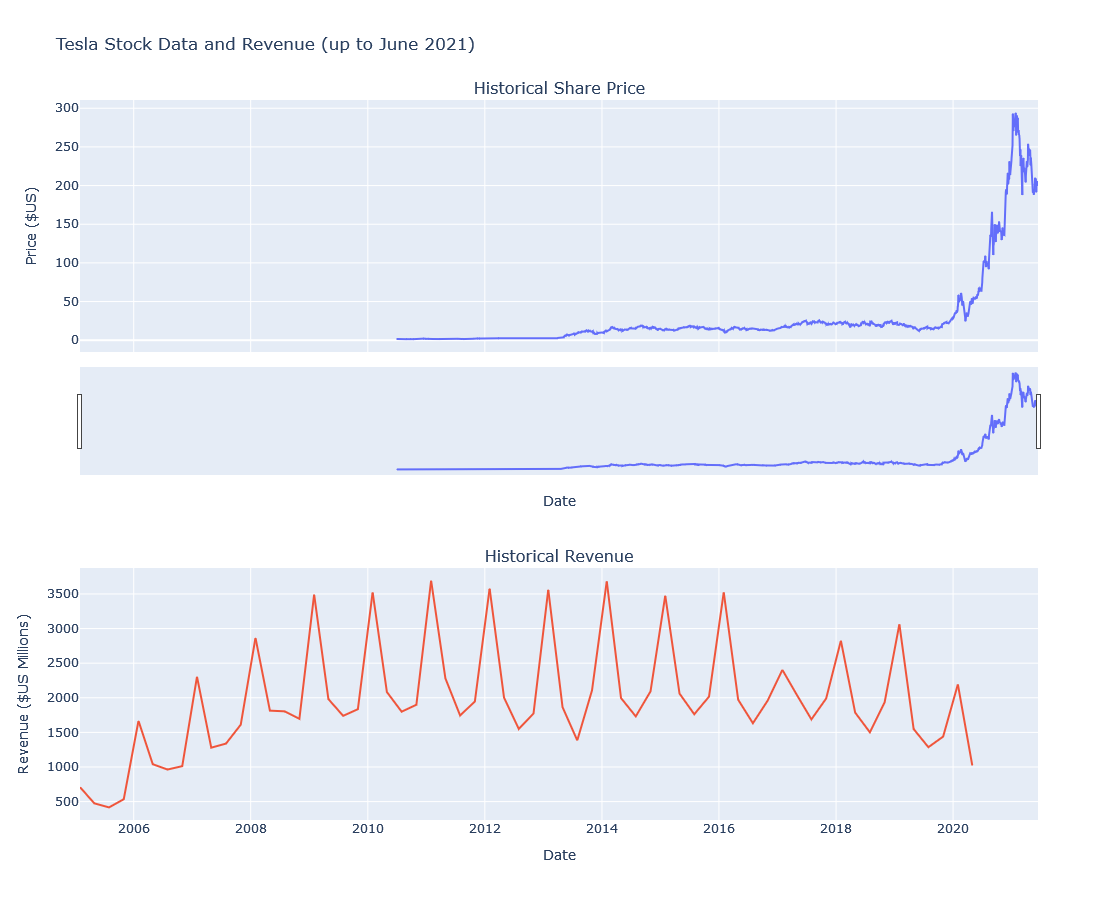

In [136]:
# Assuming you have the make_graph function defined somewhere in your code

# Call the make_graph function with Tesla data, revenue, and a title
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data and Revenue (up to June 2021)')


In [57]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Filter data to only include dates up to June 2021
    stock_data['Date'] = pd.to_datetime(stock_data.index)
    stock_data_filtered = stock_data[stock_data['Date'] <= '2021-06-30']
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot stock price data
    ax1.plot(stock_data_filtered['Date'], stock_data_filtered['Close'], label='Tesla Stock Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis to plot revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='Tesla Revenue', color='orange')
    ax2.set_ylabel('Revenue (in millions USD)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Set the title
    plt.title(title)
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


C:\Users\dell\AppData\Local\Temp\ipykernel_21656\2068038883.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\dell\AppData\Local\Temp\ipykernel_21656\2068038883.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



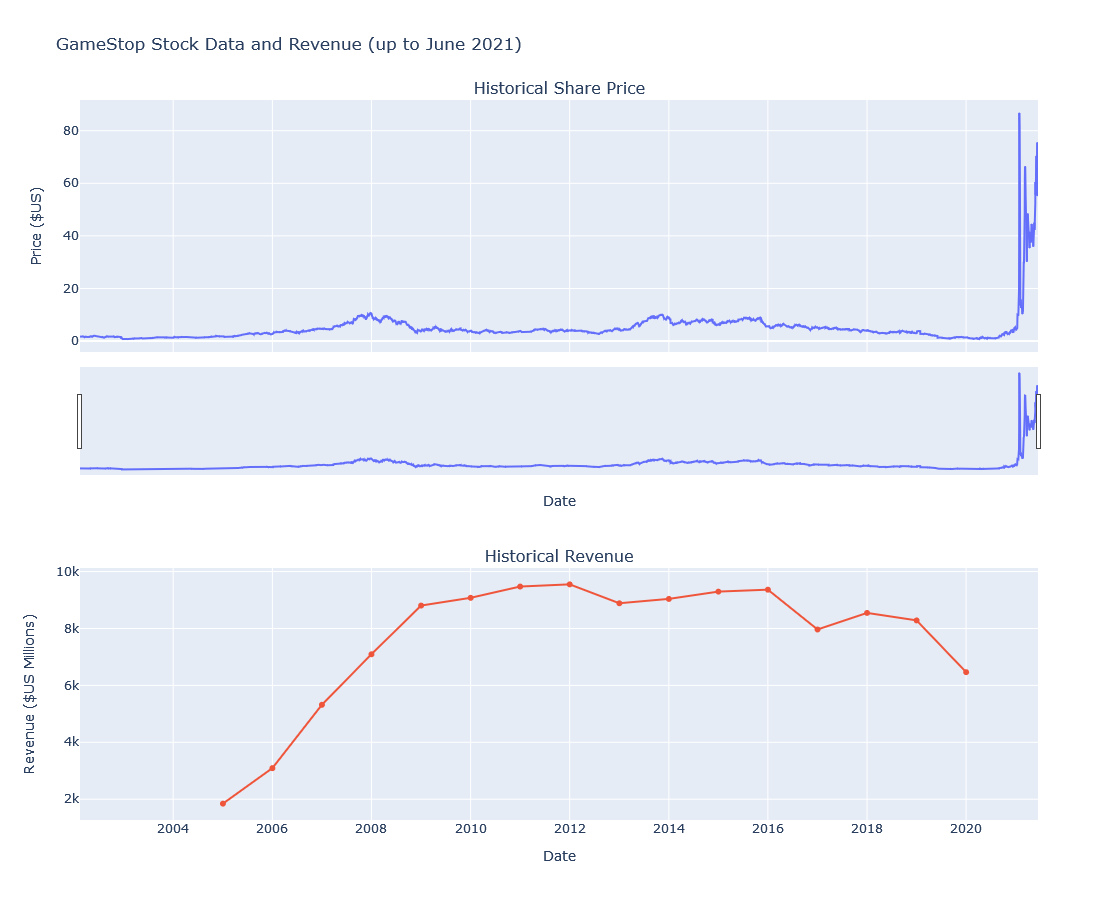

In [137]:
# Assuming you have the make_graph function defined somewhere in your code

# Call the make_graph function with GameStop data, revenue, and a title
make_graph(gme_data, gme_revenue, 'GameStop Stock Data and Revenue (up to June 2021)')


In [59]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    # Filter data to only include dates up to June 2021
    stock_data['Date'] = pd.to_datetime(stock_data.index)
    stock_data_filtered = stock_data[stock_data['Date'] <= '2021-06-30']
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot stock price data
    ax1.plot(stock_data_filtered['Date'], stock_data_filtered['Close'], label='GameStop Stock Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis to plot revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='GameStop Revenue', color='orange')
    ax2.set_ylabel('Revenue (in millions USD)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Set the title
    plt.title(title)
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
